In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

import pystrata

from lampa.input import LPyStrataInput
from lampa.input import LTimeSeriesMotion
from lampa.input import LSoilType, LDarendeliSoilType
from lampa.input import LLayer
from lampa.project import LProject

### Διέγερση

In [2]:
ltsm = LTimeSeriesMotion.from_txt('ATH49901T2.txt')
# ltsm = LTimeSeriesMotion.from_txt('Kocaeli.txt')
# ltsm = LTimeSeriesMotion.from_excel('Kocaeli.xlsx')
# ltsm = LTimeSeriesMotion.from_csv('Kocaeli.csv')

### Εδαφικές στρώσεις

In [3]:
layers = list[LLayer]()

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Loose Sand', unit_wt=16.0, damping=0.05),
                  thickness=5,
                  shear_vel=140))

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Clay', unit_wt=18.0, damping=0.05),
                  thickness=15,
                  shear_vel=250))

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Dense Sand', unit_wt=20.0, damping=0.05),
                  thickness=30,
                  shear_vel=450))

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Rock', unit_wt=23.0, damping=0.02),
                  thickness=0,
                  shear_vel=1200))

# layers.append(LLayer(layer_type='DarendeliSoilType',
#                   layer_properties=LDarendeliSoilType(name='SandDaredeli', unit_wt=16.0),
#                   thickness=5,
#                   shear_vel=140))



In [4]:
lpsi = LPyStrataInput(name='input_test',
                      calculator_type = 'LinearElasticCalculator',  # LCalculatorType.EQUIVALENT_LINEAR_CALCULATOR,
                      time_series_motion=ltsm,
                      layers=layers)

In [5]:
lpsi

LPyStrataInput(name='input_test', calculator_type='LinearElasticCalculator', time_series_motion=LTimeSeriesMotion(description='', time_step=0.005, accels=array([-1.63098879e-05, -1.12130479e-04, -3.70030581e-04, ...,
       -1.43934760e-03, -1.22222222e-03, -3.28236493e-04])), layers=[LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Loose Sand', unit_wt=16.0, damping=0.05), thickness=5, shear_vel=140), LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Clay', unit_wt=18.0, damping=0.05), thickness=15, shear_vel=250), LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Dense Sand', unit_wt=20.0, damping=0.05), thickness=30, shear_vel=450), LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Rock', unit_wt=23.0, damping=0.02), thickness=0, shear_vel=1200)])

<AxesSubplot: xlabel='Initial $V_s$ (m/s)', ylabel='Depth (m)'>

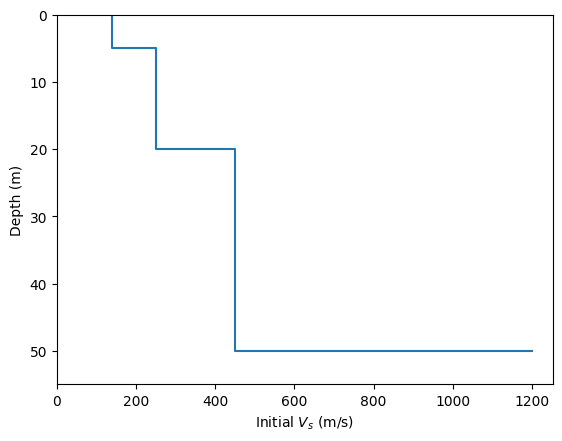

In [6]:
lpsi.to_pystrata_profile.plot("initial_shear_vel")

In [7]:
lproject = LProject(lpsi)

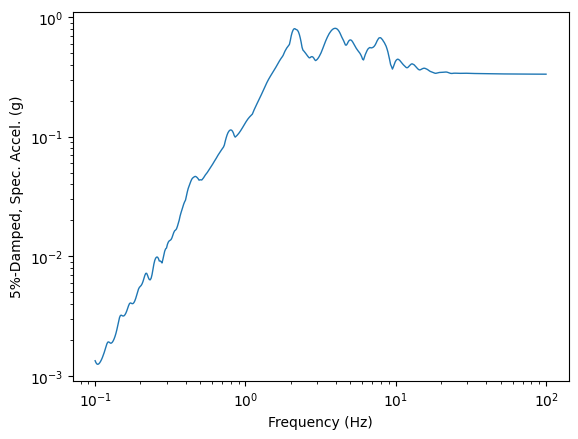

In [8]:
freqs = np.logspace(-1, 2, num=500)
lproject.response_spectrum(freqs=freqs, damping=0.05, location_index=0).plot();

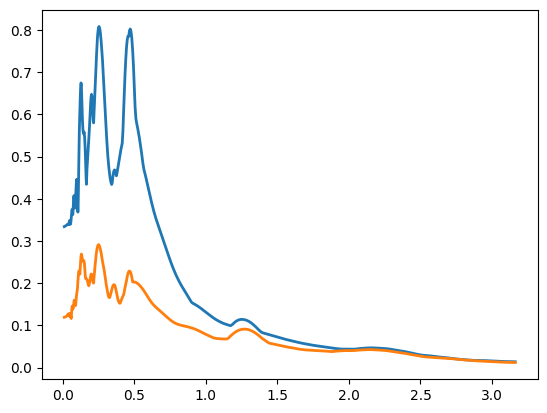

In [9]:
freqs = np.logspace(-0.5, 2, num=500)
# Στην επιφάνεια
out_index0 = lproject.response_spectrum(freqs=freqs, damping=0.05, location_index=0)
# Στον βράχο
out_index1 = lproject.response_spectrum(freqs=freqs, damping=0.05, location_index=-1)
fig, ax = plt.subplots()
ax.plot(out_index0.periods, out_index0.values, linewidth=2.0);
ax.plot(out_index1.periods, out_index1.values, linewidth=2.0);

In [10]:
# df = pd.DataFrame({'x':out_index1.periods, 'y':out_index1.values})
# df.to_clipboard()

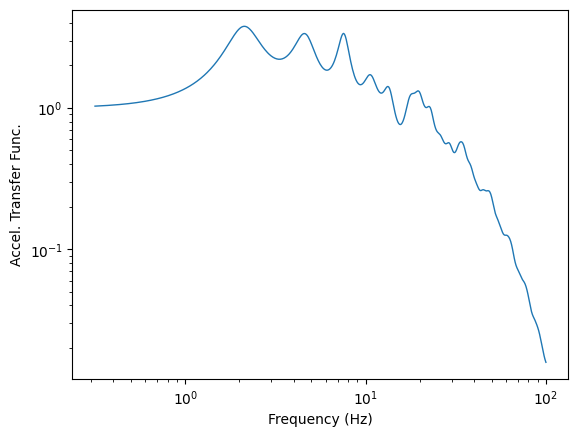

In [11]:
lproject.accel_transfer_function().plot();

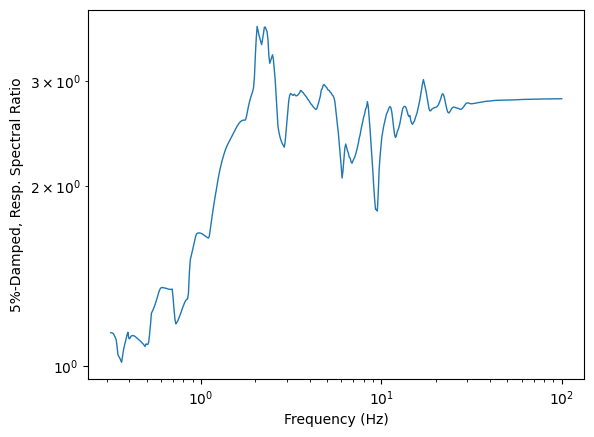

In [12]:
lproject.response_spectrum_ratio().plot();

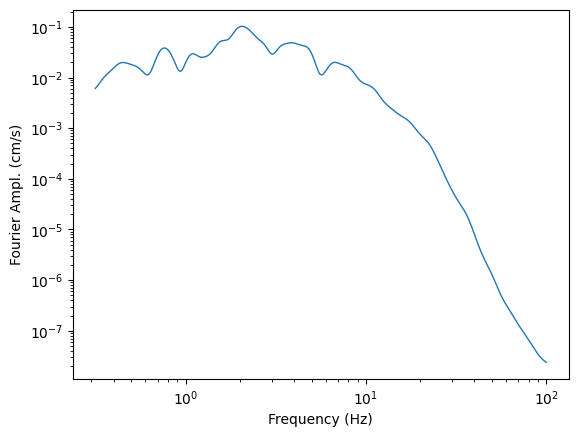

In [13]:
lproject.fourier_amplitude_spectrum().plot();

In [14]:
jjj = lpsi.to_json()

In [15]:
with open("sample.json", "w") as outfile:
    outfile.write(jjj)

In [16]:
type(jjj)

str

In [17]:
with open('sample.json', 'r') as openfile:
    ggg = json.load(openfile)

In [18]:
type(ggg)

dict

In [19]:
# lpsi = LPyStrataInput.from_json(ggg)